# Exercise 4:
Explore at least three other classification algorithms like naïve Bayes, random forest, support
vector machines, k-nearest neighbours etc. You may choose an algorithm that we did not see in
class, and that you would like to explore. Describe briefly how the algorithms work. Do not
forget to cite your sources! Report your best models after optimization of the hyper-parameters
and report their evaluation results. Choose the same measure to optimize the hyper-parameters
as in 2.

# Random Forest Algorithm

Der Algorithmus erstellt Decision Trees aus zufälligen datenproben und bekommt von jedem Tree die Vorhersage. Die beste Lösung wird anschließend ausgewählt. Random Forest liefert auch einen Indikator wie wichtig die einzelnen Merkmale für die Vorhersage sind.

In [156]:
import pandas as pd
students = pd.read_csv('~/Nextcloud/Uni/Maschinelles Lernen/students.csv', delimiter=";")
students

,Number_Enrollments_1,Number_Courses_Passed_1,Average_Mark_1,class
0,3,3,3.57,dropout
1,5,5,3.16,dropout
2,4,0,0.00,dropout
3,5,0,0.00,dropout
4,5,3,3.13,dropout
...,...,...,...,...
1716,5,0,0.00,dropout
1717,2,0,0.00,dropout
1718,5,0,0.00,dropout
1719,5,0,0.00,dropout


## Data Preprocessing

In [157]:
#check missing data
students.isna().sum()

Number_Enrollments_1       0
Number_Courses_Passed_1    0
Average_Mark_1             0
class                      0
dtype: int64

In [158]:
#replace target class with 0 and 1 
#0 means "dropout" and 1 means "graduate"
students['class'] = students['class'].replace('dropout', 0)
students['class'] = students['class'].replace('graduate', 1)

In [159]:
# one-hot encodet categorical vraiables
y = students.iloc[:,-1] # target class
X = students.iloc[:,0:3] # data

In [160]:
# split the into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

In [199]:
# converting to arrays
import numpy as np
labels = np.array(y) 
feature_list = list(X.columns)
features=np.array(X)

In [162]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1376, 3)
Training Labels Shape: (1376,)
Testing Features Shape: (345, 3)
Testing Labels Shape: (345,)


## Create Model untuned

In [163]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [164]:
# check accuracy after training
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7536231884057971


In [165]:
# test single item
# Number_Enrollments: 5, Number_Courses_passed: 3, average_mark: 3.2
# array([1]): graduated, array([0]): dropout
clf.predict([[5,5, 3.2]])


array([1])

## Tune Hyperparameter

In [166]:
# hyperparameter for model
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
criterion = ['gini', 'entropy']
min_samples_split= np.arange(0.1,1.0,0.1)
max_features = ['auto', 'sqrt', 'log2']

#Convert to dictionary
hyperparameters = dict(criterion=criterion, min_samples_split=min_samples_split, max_features=max_features)

#Create new KNN object
clf2 = RandomForestClassifier()
#Use GridSearch
clf2 = GridSearchCV(clf2, hyperparameters, cv=10)
#Fit the model
best_model = clf2.fit(X,y)

In [170]:
# Print The value of best Hyperparameters
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])

Best criterion: entropy
Best min_samples_split: 0.1
Best max_features: log2


# Test with tuned Hyperparameter

In [121]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [172]:
# test the data with untuned hyperparameter Classifier
print ("Testscore with untuned hyperparameters")
accuracy = clf.score(X_test, y_test)
print (accuracy) 

# test the data with tuned hyperparameter Classifier
print ("Testscore with tuned hyperparameters")
accuracy2 = clf2.score(X_test, y_test)
print(accuracy2)

Testscore with untuned hyperparameters
0.7536231884057971
Testscore with tuned hyperparameters
0.7855072463768116


In [186]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

Average_Mark_1             0.474174
Number_Courses_Passed_1    0.469747
Number_Enrollments_1       0.056079
dtype: float64

## Importance of Features

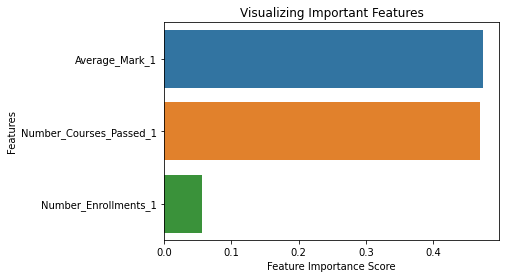

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [195]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
x=students[['Average_Mark_1', 'Number_Courses_Passed_1']]  # Removed feature "Number_Enrollments_1"
Y=students['class']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.20, random_state=5)


In [198]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
('Accuracy:', 0.7536231884057971)

Accuracy: 0.7913043478260869


('Accuracy:', 0.7536231884057971)

Die Genauigkeit ist nach dem Entfernen von 'Number_Enrollments' höher, da die irreführenden Daten die Genauigkeit stören. Mit weniger Features reduziert sich auch die Zeit des trainierens.

## Quellen:
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://machinelearningmastery.com/random-forest-ensemble-in-python/
https://www.datacamp.com/community/tutorials/random-forests-classifier-python
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html